In [1]:
#input the library
library(clusterProfiler) 
library(org.Dm.eg.db)
library(topGO)



clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, 

In [2]:
all = read.table("result_id.txt", header = TRUE,sep = " ") #全遺伝子（バックグラウンドとして使う）
head(all, n=3)

allgene <- bitr(all$name, fromType="FLYBASE", toType="ENTREZID", OrgDb="org.Dm.eg.db") #比較できるようにIDをFLYBASE_GENE_IDからENTREZIDに変換。
head(allgene)

,name,logFC,logCPM,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,FBgn0001254,10.967860,10.495947,3.162581e-196,3.296674e-192
2,FBgn0037836,-10.193363,6.846906,2.257809e-163,1.176770e-159
3,FBgn0039795,9.848162,5.966366,1.173624e-132,4.077952e-129


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(all$name, fromType = "FLYBASE", toType = "ENTREZID", OrgDb = "org.Dm.eg.db"):
“3.47% of input gene IDs are fail to map...”


,FLYBASE,ENTREZID
,<chr>,<chr>
1,FBgn0001254,38432
2,FBgn0037836,41298
3,FBgn0039795,43642
4,FBgn0024294,45041
5,FBgn0001255,48239
6,FBgn0264562,31162


In [3]:
x <- read.csv("induction_id.txt", header=TRUE,sep=",")#上の方でlogFC>=0条件で抽出したデータを読み込む。
head(x,n=3)
y <- read.csv("repression_id.txt", header=TRUE,sep=",")#上の方でlogFC<0条件で抽出したデータを読み込む。 
head(y,n=3)
induction <- bitr(x$name, fromType="FLYBASE", toType="ENTREZID", OrgDb="org.Dm.eg.db") #比較できるようにIDをLYBASE_GENE_IDからENTREZIDに変換。
head(induction)
repression <- bitr(y$name, fromType="FLYBASE", toType="ENTREZID", OrgDb="org.Dm.eg.db") #比較できるようにIDをLYBASE_GENE_IDからENTREZIDに変換。
head(repression)

,name,logFC,logCPM,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,FBgn0001254,10.967860,10.495947,3.162581e-196,3.296674e-192
2,FBgn0039795,9.848162,5.966366,1.173624e-132,4.077952e-129
3,FBgn0024294,7.469046,6.534679,8.673341e-115,2.260273e-111


,name,logFC,logCPM,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,FBgn0037836,-10.193363,6.846906,2.257809e-163,1.176770e-159
2,FBgn0259226,-5.254058,7.456834,1.620173e-66,2.412670e-63
3,FBgn0037487,-5.072558,5.563115,2.191529e-53,2.538278e-50


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(x$name, fromType = "FLYBASE", toType = "ENTREZID", OrgDb = "org.Dm.eg.db"):
“3.56% of input gene IDs are fail to map...”


,FLYBASE,ENTREZID
,<chr>,<chr>
1,FBgn0001254,38432
2,FBgn0039795,43642
3,FBgn0024294,45041
4,FBgn0001255,48239
5,FBgn0264562,31162
6,FBgn0265011,35904


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(y$name, fromType = "FLYBASE", toType = "ENTREZID", OrgDb = "org.Dm.eg.db"):
“1.68% of input gene IDs are fail to map...”


,FLYBASE,ENTREZID
,<chr>,<chr>
1,FBgn0037836,41298
2,FBgn0259226,35838
3,FBgn0037487,40868
4,FBgn0036690,39909
5,FBgn0263256,318843
6,FBgn0266758,42929


In [4]:
egoBP <- enrichGO(gene = induction[,2], 
　universe = allgene[,2], #allgeneと比較
　OrgDb = org.Dm.eg.db, 
　ont = "BP",
　pAdjustMethod = "BH",
　pvalueCutoff = 0.01, 
　qvalueCutoff = 0.05, 
　readable = TRUE)
head(egoBP)#show the result
write.table(egoBP[,-8], "GO_BP_over-representation.txt", quote=F, col.names=TRUE, sep ="\t") #保存

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0005975,GO:0005975,carbohydrate metabolic process,46/771,204/8159,1.347929e-08,3.032841e-05,2.836327e-05,Cht5/Oscillin/fbp/Hexo1/Cda4/Gyg/Cht10/Tpi/Ald1/Gbs-70E/Gld/Pgant7/GNBP3/CG9008/UGP/Pgant5/Sik3/Amy-p/alpha-Man-IIa/Amy-d/Pgk/Gapdh2/CD98hc/Mal-A2/CG5731/CG11594/Amyrel/GCS2alpha/Gbs-76A/Mal-A3/betaGlu/Treh/Mal-A4/CG33090/GlyS/Mgat2/PhKgamma/Lztr1/Pgant2/CG8460/Pfk/Pglym78/Atg1/Axn/Pgant1/Cht4,46
GO:0048736,GO:0048736,appendage development,63/771,335/8159,5.358615e-08,6.028442e-05,5.637827e-05,asRNA:bsAS/al/Fkbp14/nub/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/trh/peg/Alh/Dl/fz/fw/sca/drl/disco/Duox/trx/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,63
GO:0048737,GO:0048737,imaginal disc-derived appendage development,61/771,332/8159,2.089261e-07,1.566946e-04,1.465415e-04,asRNA:bsAS/al/Fkbp14/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Alh/Dl/fz/fw/sca/drl/disco/Duox/trx/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,61
GO:0007560,GO:0007560,imaginal disc morphogenesis,69/771,399/8159,3.643748e-07,1.639686e-04,1.533442e-04,ImpE2/ImpE3/asRNA:bsAS/ImpE1/al/Fkbp14/bab2/Mnn1/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Doc2/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Doc1/Dl/Doc3/fz/pnr/fw/Pkn/sca/Cyp301a1/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/Sdr/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,69
GO:0048563,GO:0048563,post-embryonic animal organ morphogenesis,69/771,399/8159,3.643748e-07,1.639686e-04,1.533442e-04,ImpE2/ImpE3/asRNA:bsAS/ImpE1/al/Fkbp14/bab2/Mnn1/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Doc2/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Doc1/Dl/Doc3/fz/pnr/fw/Pkn/sca/Cyp301a1/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/Sdr/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,69
GO:0035107,GO:0035107,appendage morphogenesis,59/771,327/8159,6.308111e-07,2.365542e-04,2.212266e-04,asRNA:bsAS/al/Fkbp14/nub/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Dl/fz/fw/sca/disco/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,59


In [5]:
egoCC <- enrichGO(gene = induction[,2], 
　universe = allgene[,2], #allgeneと比較
　OrgDb = org.Dm.eg.db, 
　ont = "CC",
　pAdjustMethod = "BH",
　pvalueCutoff = 0.01, 
　qvalueCutoff = 0.05, 
　readable = TRUE)
head(egoBP)#show the result
write.table(egoBP[,-8], "GO_CC_over-representation.txt", quote=F, col.names=TRUE, sep ="\t") #保存

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0005975,GO:0005975,carbohydrate metabolic process,46/771,204/8159,1.347929e-08,3.032841e-05,2.836327e-05,Cht5/Oscillin/fbp/Hexo1/Cda4/Gyg/Cht10/Tpi/Ald1/Gbs-70E/Gld/Pgant7/GNBP3/CG9008/UGP/Pgant5/Sik3/Amy-p/alpha-Man-IIa/Amy-d/Pgk/Gapdh2/CD98hc/Mal-A2/CG5731/CG11594/Amyrel/GCS2alpha/Gbs-76A/Mal-A3/betaGlu/Treh/Mal-A4/CG33090/GlyS/Mgat2/PhKgamma/Lztr1/Pgant2/CG8460/Pfk/Pglym78/Atg1/Axn/Pgant1/Cht4,46
GO:0048736,GO:0048736,appendage development,63/771,335/8159,5.358615e-08,6.028442e-05,5.637827e-05,asRNA:bsAS/al/Fkbp14/nub/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/trh/peg/Alh/Dl/fz/fw/sca/drl/disco/Duox/trx/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,63
GO:0048737,GO:0048737,imaginal disc-derived appendage development,61/771,332/8159,2.089261e-07,1.566946e-04,1.465415e-04,asRNA:bsAS/al/Fkbp14/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Alh/Dl/fz/fw/sca/drl/disco/Duox/trx/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,61
GO:0007560,GO:0007560,imaginal disc morphogenesis,69/771,399/8159,3.643748e-07,1.639686e-04,1.533442e-04,ImpE2/ImpE3/asRNA:bsAS/ImpE1/al/Fkbp14/bab2/Mnn1/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Doc2/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Doc1/Dl/Doc3/fz/pnr/fw/Pkn/sca/Cyp301a1/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/Sdr/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,69
GO:0048563,GO:0048563,post-embryonic animal organ morphogenesis,69/771,399/8159,3.643748e-07,1.639686e-04,1.533442e-04,ImpE2/ImpE3/asRNA:bsAS/ImpE1/al/Fkbp14/bab2/Mnn1/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Doc2/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Doc1/Dl/Doc3/fz/pnr/fw/Pkn/sca/Cyp301a1/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/Sdr/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,69
GO:0035107,GO:0035107,appendage morphogenesis,59/771,327/8159,6.308111e-07,2.365542e-04,2.212266e-04,asRNA:bsAS/al/Fkbp14/nub/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Dl/fz/fw/sca/disco/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,59


In [6]:
egoMF <- enrichGO(gene = induction[,2], 
　universe = allgene[,2], #allgeneと比較
　OrgDb = org.Dm.eg.db, 
　ont = "MF",
　pAdjustMethod = "BH",
　pvalueCutoff = 0.01, 
　qvalueCutoff = 0.05, 
　readable = TRUE)
head(egoBP)#show the result
write.table(egoBP[,-8], "GO_MF_over-representation.txt", quote=F, col.names=TRUE, sep ="\t") #保存

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0005975,GO:0005975,carbohydrate metabolic process,46/771,204/8159,1.347929e-08,3.032841e-05,2.836327e-05,Cht5/Oscillin/fbp/Hexo1/Cda4/Gyg/Cht10/Tpi/Ald1/Gbs-70E/Gld/Pgant7/GNBP3/CG9008/UGP/Pgant5/Sik3/Amy-p/alpha-Man-IIa/Amy-d/Pgk/Gapdh2/CD98hc/Mal-A2/CG5731/CG11594/Amyrel/GCS2alpha/Gbs-76A/Mal-A3/betaGlu/Treh/Mal-A4/CG33090/GlyS/Mgat2/PhKgamma/Lztr1/Pgant2/CG8460/Pfk/Pglym78/Atg1/Axn/Pgant1/Cht4,46
GO:0048736,GO:0048736,appendage development,63/771,335/8159,5.358615e-08,6.028442e-05,5.637827e-05,asRNA:bsAS/al/Fkbp14/nub/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/trh/peg/Alh/Dl/fz/fw/sca/drl/disco/Duox/trx/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,63
GO:0048737,GO:0048737,imaginal disc-derived appendage development,61/771,332/8159,2.089261e-07,1.566946e-04,1.465415e-04,asRNA:bsAS/al/Fkbp14/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Alh/Dl/fz/fw/sca/drl/disco/Duox/trx/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,61
GO:0007560,GO:0007560,imaginal disc morphogenesis,69/771,399/8159,3.643748e-07,1.639686e-04,1.533442e-04,ImpE2/ImpE3/asRNA:bsAS/ImpE1/al/Fkbp14/bab2/Mnn1/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Doc2/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Doc1/Dl/Doc3/fz/pnr/fw/Pkn/sca/Cyp301a1/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/Sdr/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,69
GO:0048563,GO:0048563,post-embryonic animal organ morphogenesis,69/771,399/8159,3.643748e-07,1.639686e-04,1.533442e-04,ImpE2/ImpE3/asRNA:bsAS/ImpE1/al/Fkbp14/bab2/Mnn1/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Doc2/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Doc1/Dl/Doc3/fz/pnr/fw/Pkn/sca/Cyp301a1/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/Sdr/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,69
GO:0035107,GO:0035107,appendage morphogenesis,59/771,327/8159,6.308111e-07,2.365542e-04,2.212266e-04,asRNA:bsAS/al/Fkbp14/nub/pk/RhoGEF64C/nmo/ltl/dy/dac/kn/Dll/vg/dysf/inv/dve/bi/bs/m/MYPT-75D/arr/bbg/ovo/jing/Fhos/bowl/scrib/lft/Pka-C3/hh/pio/disco-r/zfh2/en/peg/Dl/fz/fw/sca/disco/Duox/Pgcl/RhoGAP19D/tay/S/qua/wmd/stan/mam/Hs6st/ara/skd/dgo/ss/Axn/how/Egfr/Pal1/mirr,59


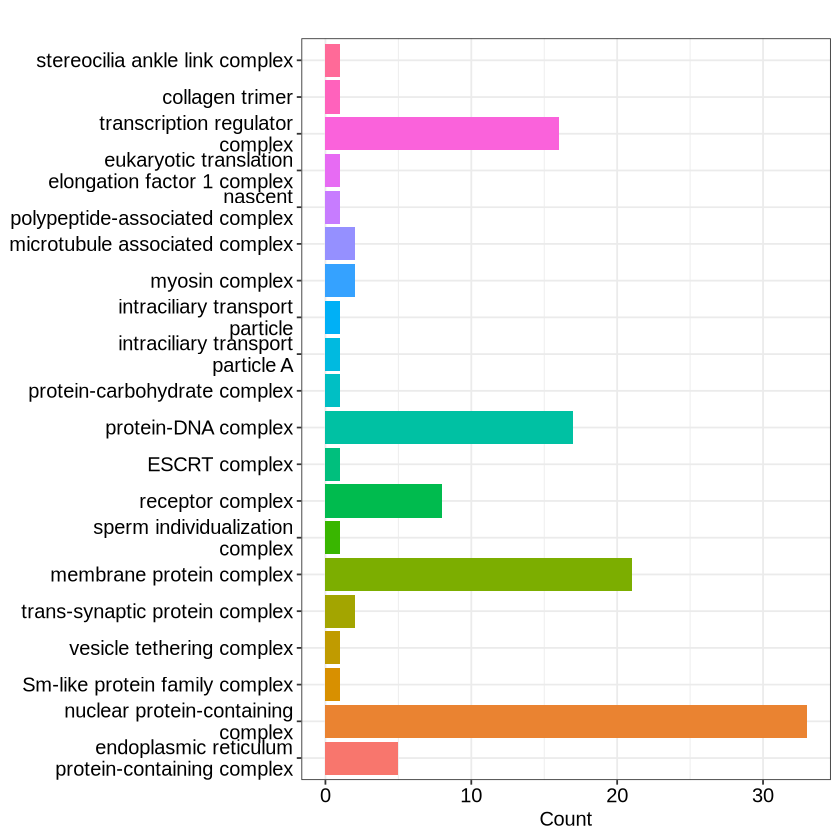

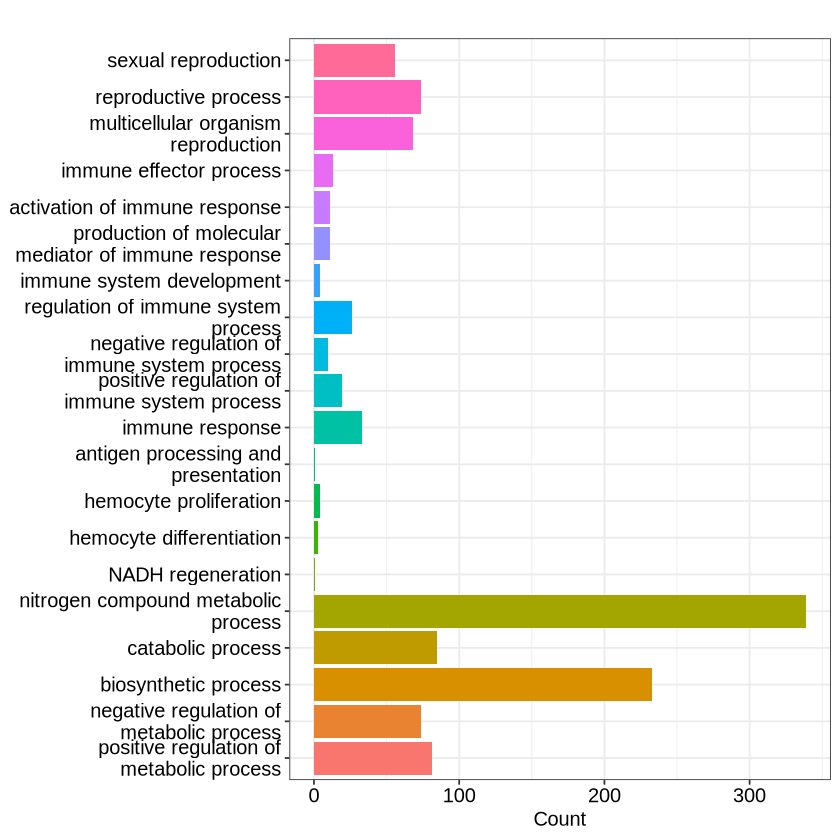

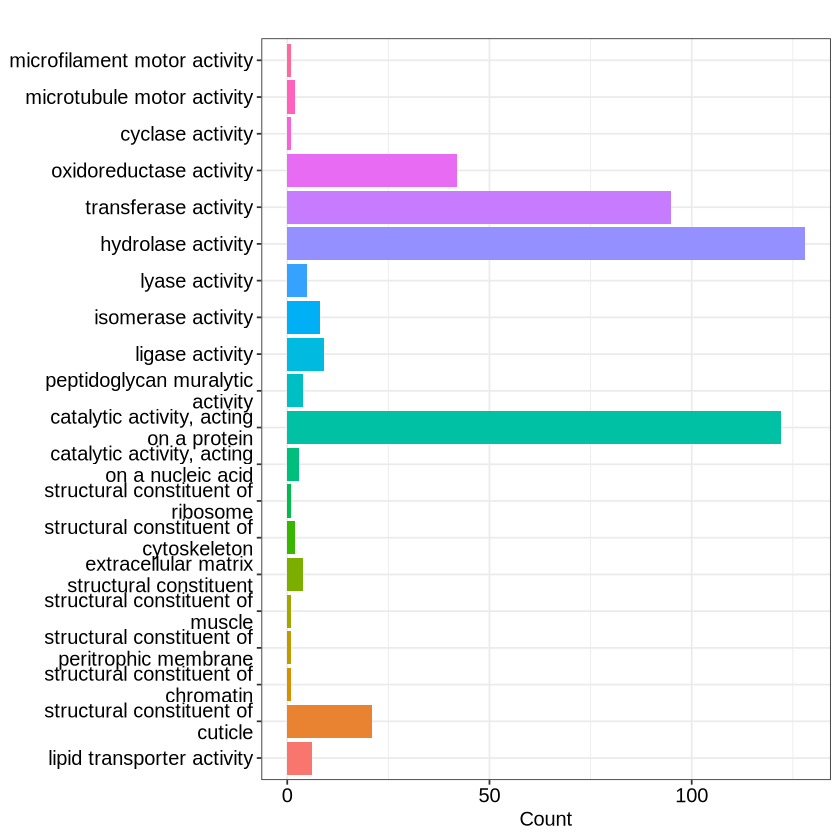

In [7]:
ggoCC <- groupGO(gene = induction$ENTREZID, OrgDb = org.Dm.eg.db, ont = "CC", level = 3, readable = TRUE) #cell component
ggoBP <- groupGO(gene = induction$ENTREZID, OrgDb = org.Dm.eg.db, ont = "BP", level = 3, readable = TRUE) #biological process
ggoMF <- groupGO(gene = induction$ENTREZID, OrgDb = org.Dm.eg.db, ont = "MF", level = 3, readable = TRUE) #molecular function

barplot(ggoCC, drop=TRUE, showCategory=20, font=12) #検出されたGOの数のグラフ
barplot(ggoBP, drop=TRUE, showCategory=20, font=12) #検出されたGOの数のグラフ
barplot(ggoMF, drop=TRUE, showCategory=20, font=12) #検出されたGOの数のグラフ

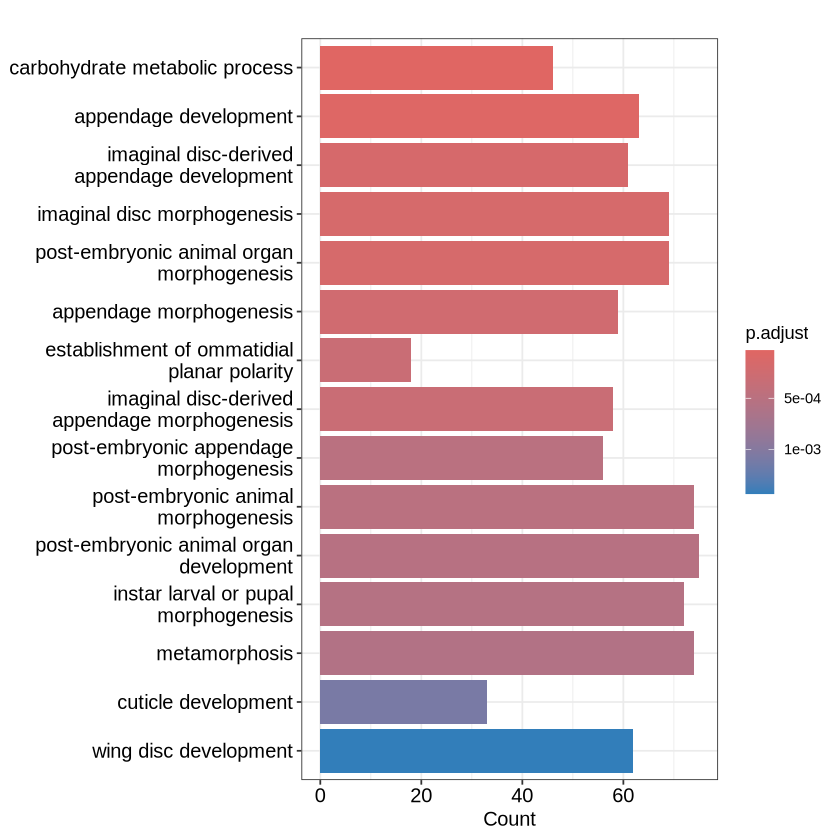

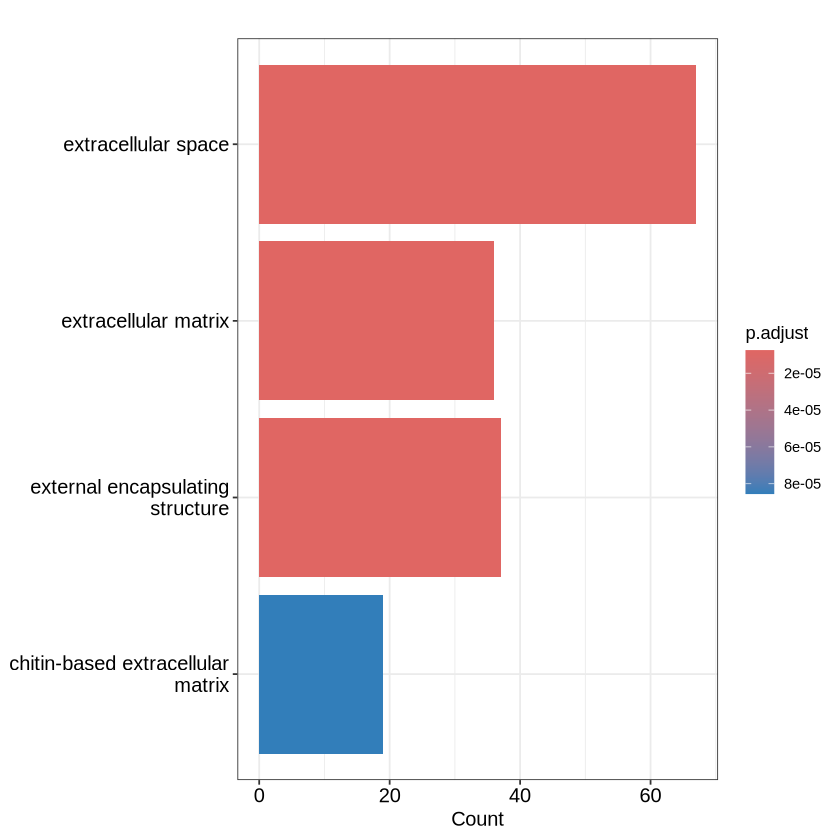

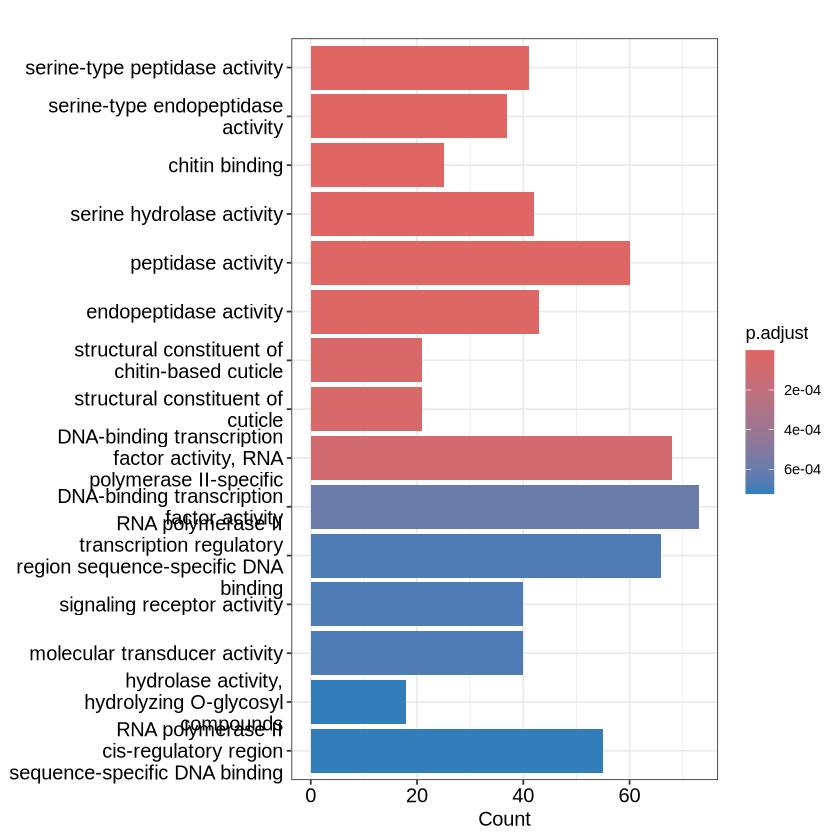

In [8]:
barplot(egoBP, showCategory=15, font=12)#gene ontology graph of biological process
barplot(egoCC, showCategory=15, font=12)#gene ontology graph of cell component 
barplot(egoMF, showCategory=15, font=12)#gene ontology graph of molecular function

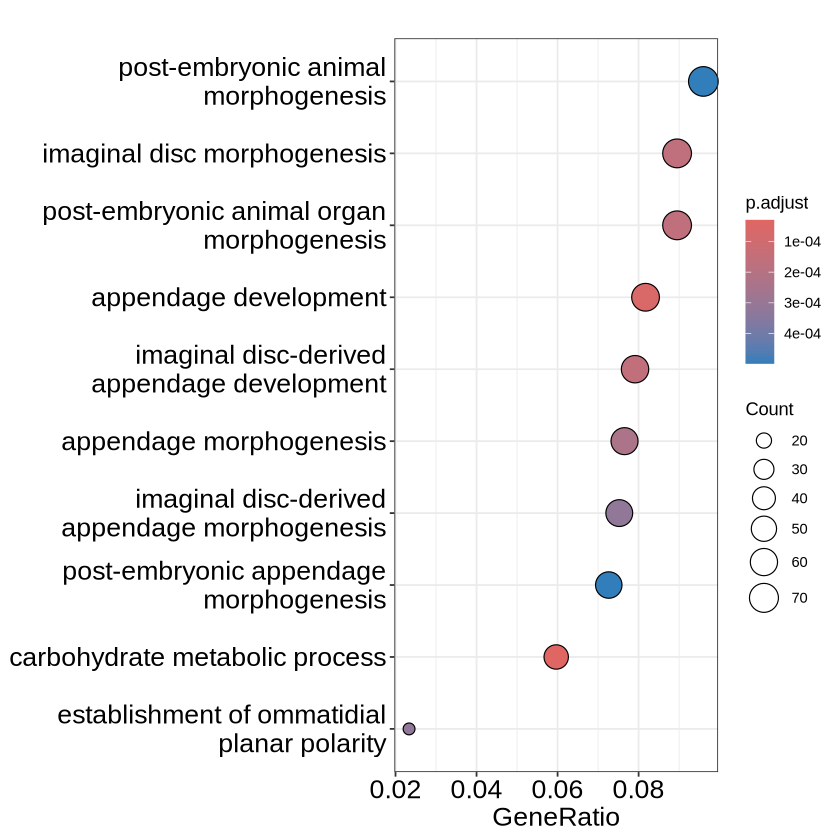

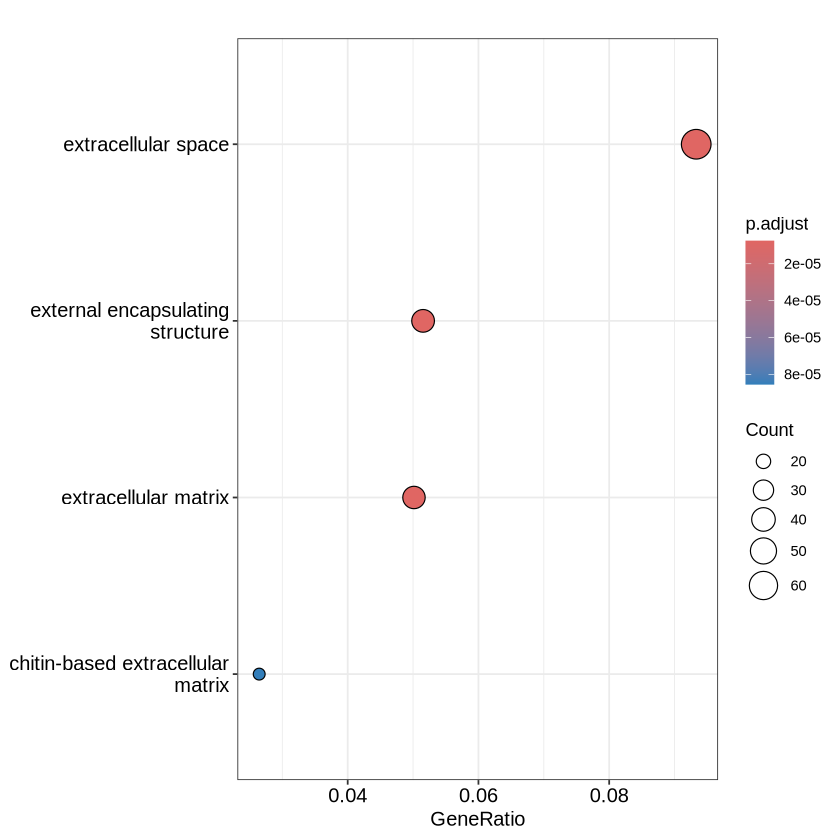

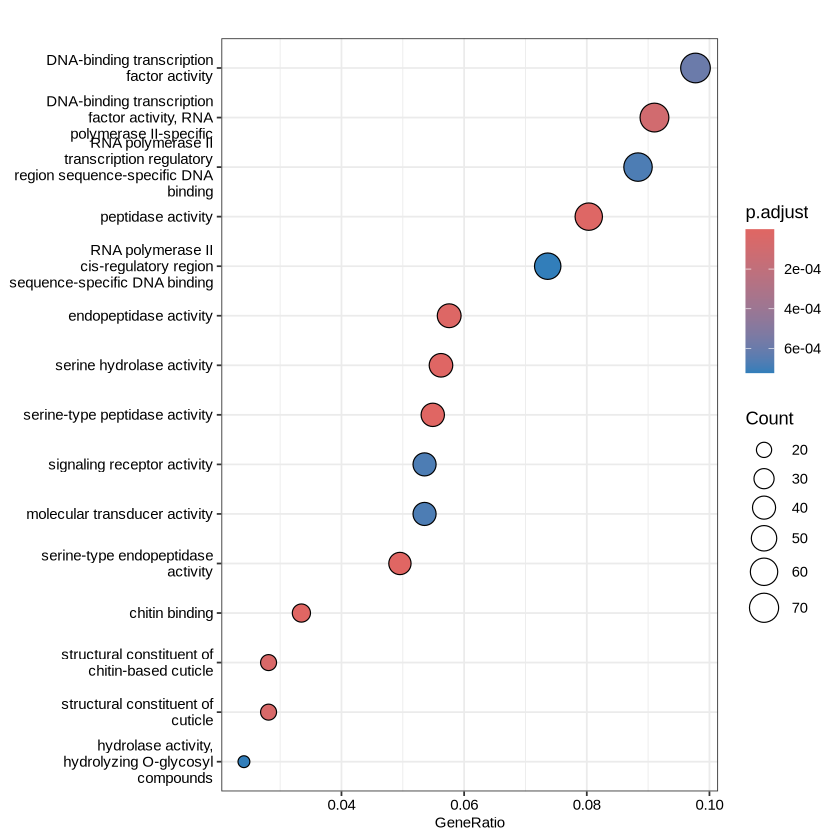

In [9]:
dotplot(egoBP,showCategory=10, font=16)
dotplot(egoCC,showCategory=15, font=12)
dotplot(egoMF,showCategory=15, font=9)


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.


Building most specific GOs .....

	( 458 GO terms found. )


Build GO DAG topology ..........

	( 458 GO terms and 750 relations. )


Annotating nodes ...............

	( 7969 genes annotated to the GO terms. )

Loading required package: Rgraphviz

Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:topGO’:

    depth



Attaching package: ‘Rgraphviz’


The following objects are masked from ‘package:IRanges’:

    from, to


The following objects are masked from ‘package:S4Vectors’:

    from, to




$dag
A graphNEL graph with directed edges
Number of Nodes = 8 
Number of Edges = 9 

$complete.dag
[1] "A graph with 8 nodes."



groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.


Building most specific GOs .....

	( 3401 GO terms found. )


Build GO DAG topology ..........

	( 3401 GO terms and 7142 relations. )


Annotating nodes ...............

	( 8159 genes annotated to the GO terms. )



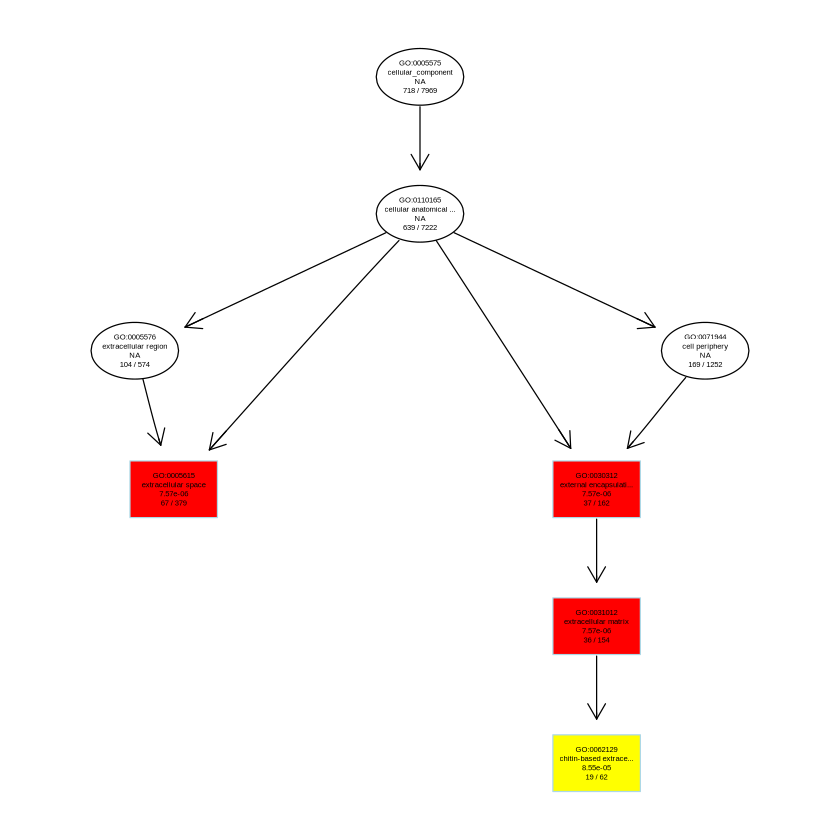

$dag
A graphNEL graph with directed edges
Number of Nodes = 45 
Number of Edges = 71 

$complete.dag
[1] "A graph with 45 nodes."



groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.


Building most specific GOs .....

	( 924 GO terms found. )


Build GO DAG topology ..........

	( 924 GO terms and 1201 relations. )


Annotating nodes ...............

	( 7731 genes annotated to the GO terms. )



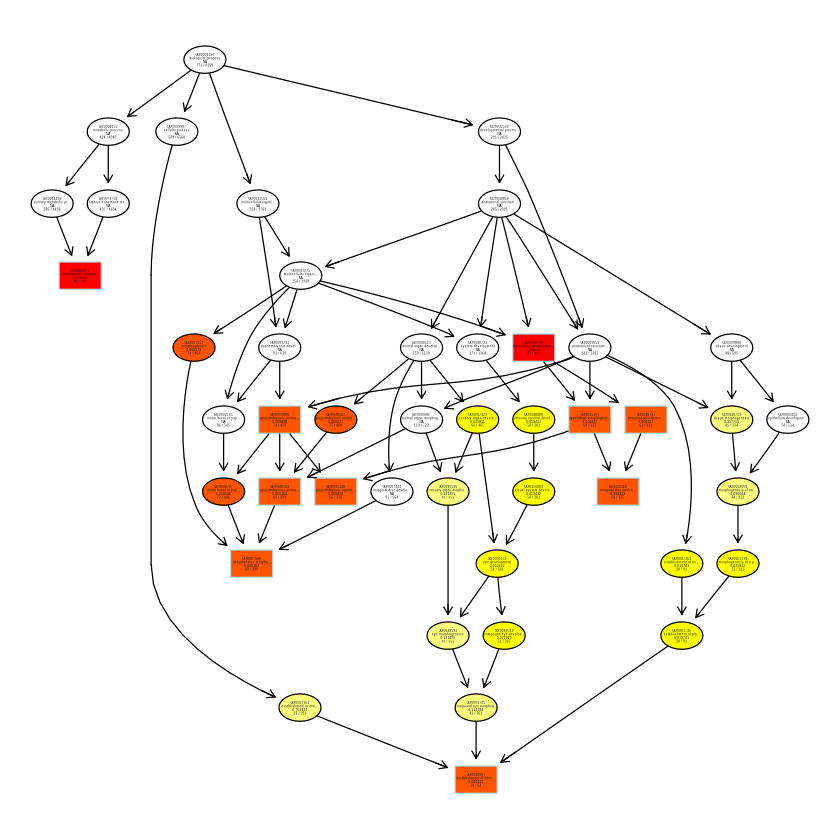

$dag
A graphNEL graph with directed edges
Number of Nodes = 18 
Number of Edges = 20 

$complete.dag
[1] "A graph with 18 nodes."


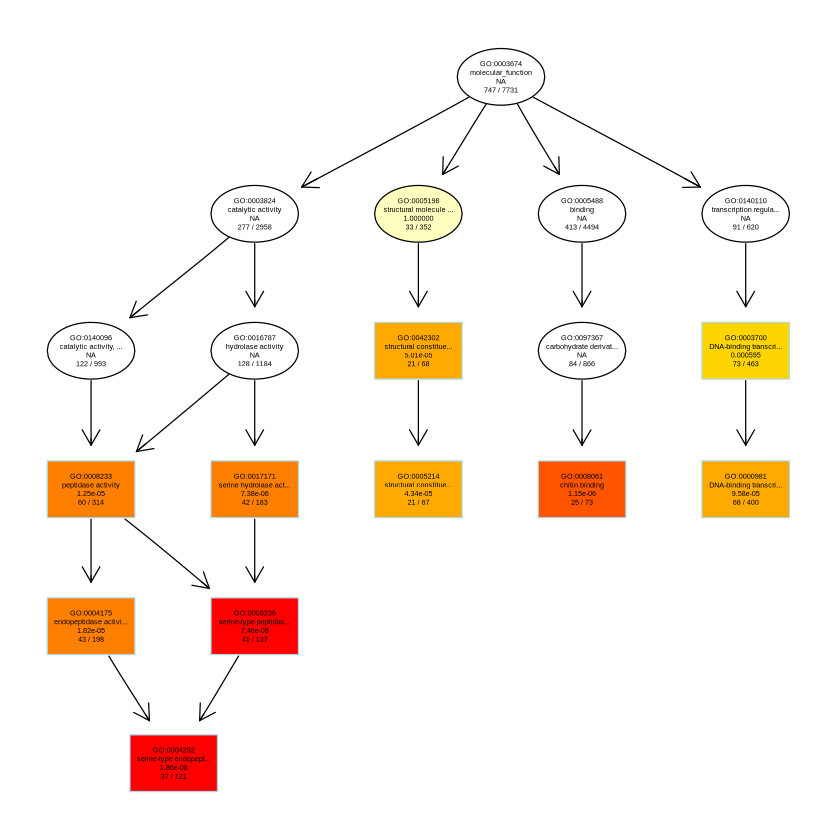

In [10]:
plotGOgraph(egoCC)
plotGOgraph(egoBP)
plotGOgraph(egoMF)

$dag
A graphNEL graph with directed edges
Number of Nodes = 45 
Number of Edges = 71 

$complete.dag
[1] "A graph with 45 nodes."
